/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_38307/1163111349.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[2 , 0].set_xticklabels(top_countries['Countries and areas'] ,
/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_38307/1163111349.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[2 , 1].set_xticklabels(top_countries['Countries and areas'] ,
/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_38307/1163111349.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1 , 1].set_xticklabels(top6_df['Countries and areas'] ,


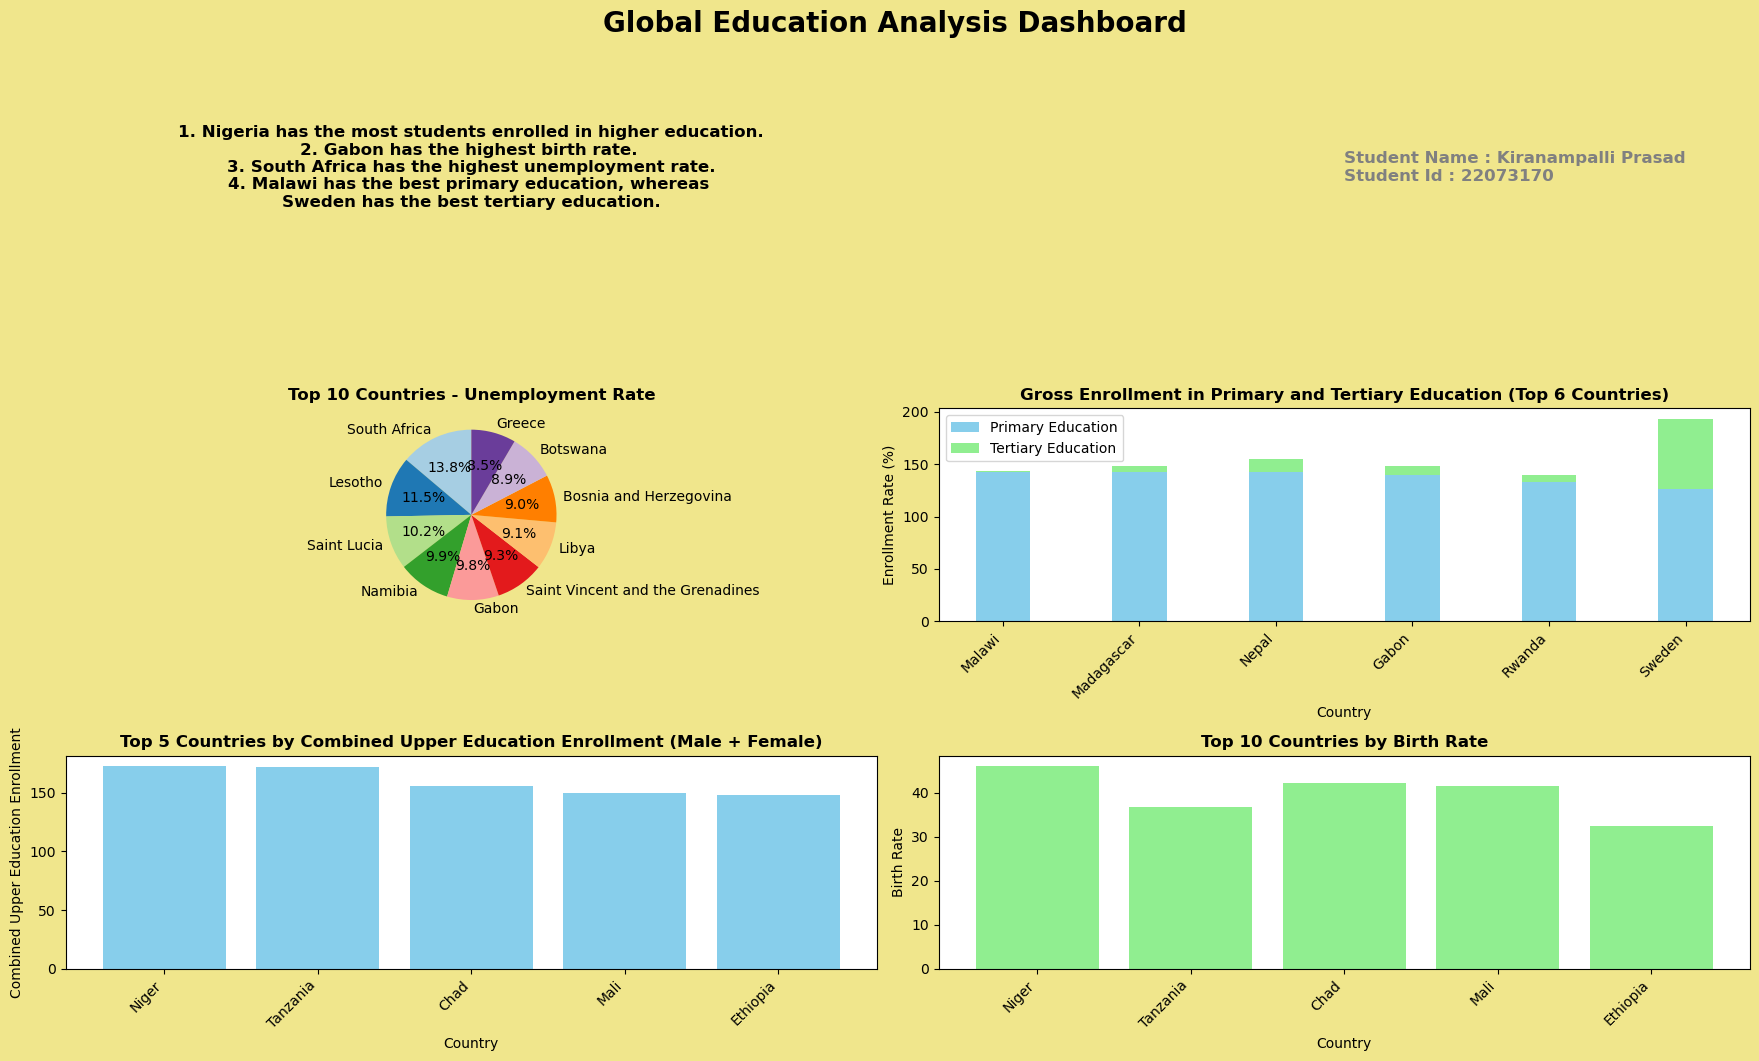

In [2]:
#Data Source Link : https://www.kaggle.com/code/nelgiriyewithana/introduction-to-world-educational-data/input
#Github Link : https://github.com/kp23aav/Data-Handling-and-Visualisation.git

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Global_Education.csv'

df = pd.read_csv(file_path , encoding='latin1')

top_countries = df.sort_values(by='Unemployment_Rate' ,
                               ascending=False).head(5)

# Create a figure with subplots
fig , axis = plt.subplots(nrows=3 , ncols=2 , figsize=(18 , 12))
# Background Color
background_color = '#F0E68C'  # Light gray background color

# Set the facecolor of the entire figure
fig.patch.set_facecolor(background_color)

# Plot 1: Bar plot for Unemployment Rate (Top 6 countries)
# Sum the enrollment values for upper education (male and female)
df['Combined_Upper_Education_Enrollment'] = \
       df['OOSR_Upper_Secondary_Age_Male'] + df['OOSR_Upper_Secondary_Age_Female']

# Sort the DataFrame by combined upper education enrollment
# and select the top 5 countries
top_countries = df.sort_values(by='Combined_Upper_Education_Enrollment' ,
                               ascending=False).head(5)


# Bar plot for combined upper education enrollment (Top 5 countries)
axis[2 , 0].bar(top_countries['Countries and areas'] ,
              top_countries['Combined_Upper_Education_Enrollment'] , color='skyblue')
axis[2 , 0].set_xlabel('Country')
axis[2 , 0].set_ylabel('Combined Upper Education Enrollment')
axis[2 , 0].set_title('Top 5 Countries by Combined Upper Education Enrollment (Male + Female)' ,
                    fontweight='bold')
axis[2 , 0].set_xticklabels(top_countries['Countries and areas'] ,
                           rotation=45 , ha='right')


# Plot 2: Bar plot for Birth Rate (Top 10 countries)
axis[2 , 1].bar(top_countries['Countries and areas'] ,
               top_countries['Birth_Rate'] , color='lightgreen')
axis[2 , 1].set_xlabel('Country')
axis[2 , 1].set_ylabel('Birth Rate')
axis[2 , 1].set_title('Top 10 Countries by Birth Rate' , fontweight='bold')
axis[2 , 1].set_xticklabels(top_countries['Countries and areas'] ,
                           rotation=45 , ha='right')

# Plot 3: Pie chart for Unemployment Rate (Top 10 countries)
top_10_countries_unemployment = df.nlargest(10 , 'Unemployment_Rate')

axis[1 , 0].pie(top_10_countries_unemployment['Unemployment_Rate'] ,
               labels=top_10_countries_unemployment['Countries and areas'] ,
               autopct='%1.1f%%' , startangle=90 , colors=plt.cm.Paired.colors)
axis[1 , 0].set_title('Top 10 Countries - Unemployment Rate' ,fontweight='bold')

# Sort the dataframe by Gross Primary Education Enrollment in descending order
df_sorted = df.sort_values(by='Gross_Primary_Education_Enrollment' , ascending=False)

# Select the top 6 countries
top6_df = df_sorted.head(6)
# Plot 4: Bar plot for Gross Enrollment in Primary and Tertiary Education (Top 6 countries)
axis[1 , 1].bar(top6_df['Countries and areas'] , top6_df['Gross_Primary_Education_Enrollment'] ,
               width=0.4 , label='Primary Education' , color='skyblue')
axis[1 , 1].bar(top6_df['Countries and areas'] , top6_df['Gross_Tertiary_Education_Enrollment'] ,
               width=0.4 , bottom=top6_df['Gross_Primary_Education_Enrollment'] ,
               label='Tertiary Education' , color='lightgreen')
axis[1 , 1].set_xlabel('Country')
axis[1 , 1].set_ylabel('Enrollment Rate (%)')
axis[1 , 1].set_title('Gross Enrollment in Primary and Tertiary Education (Top 6 Countries)',
                     fontweight='bold')
axis[1 , 1].set_xticklabels(top6_df['Countries and areas'] ,
                           rotation=45 , ha='right')
axis[1 , 1].legend()

text = "1. Nigeria has the most students enrolled in higher education.\n" \
       "2. Gabon has the highest birth rate. \n" \
       "3. South Africa has the highest unemployment rate.\n" \
       "4. Malawi has the best primary education, whereas \n" \
       "Sweden has the best tertiary education."
axis[0 , 0].text(0.5 , 0.5 , text , ha='center' , va='center' ,
                fontsize=12 , color='black' , wrap=True ,fontweight='bold')
axis[0 , 0].axis('off')
text = "Student Name : Kiranampalli Prasad \n" \
       "Student Id : 22073170"
axis[0 , 1].text(0.5 , 0.5 , text , ha='left' , va='center' ,
                fontsize=12 , color='gray' , wrap=True , fontweight='bold')
axis[0 , 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0 , 0.1 , 1 , 0.95])
fig.suptitle('Global Education Analysis Dashboard' ,
             fontsize=20 , fontweight='bold')

plt.savefig('22073170.png')

# Show the dashboard
# plt.show()
